## Exercise 2.11
(programming) Make a figure analogous to Figure 2.6 for the nonstationary case outlined in Exercise 2.5 . Include the constant-step-size ε-greedy algorithm with α = 0.1. Use runs of 200,000 steps and, as a performance measure for each algorithm and parameter setting, use the average reward over the last 100,000 steps.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from experiment import Experiment

100%|██████████| 50/50 [00:49<00:00,  1.01it/s]


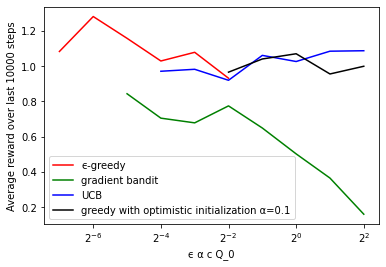

In [2]:
fig, ax = plt.subplots()

exp = Experiment()


exp.set_config('problem_name', 'nonstationary')
exp.set_config('n_steps', 20000)

exp.set_config('solver_name', 'epsilon-greedy')
epsilon = [1/128, 1/64, 1/32, 1/16, 1/8, 1/4]
average_reward_over_last_10000_steps = []

for e in epsilon:
    exp.set_config('epsilon', e)
    average_reward, _ = exp.run('experiment')
    average_reward_over_last_10000_steps.append(np.mean(average_reward[10000:]))
plt.plot(epsilon, average_reward_over_last_10000_steps, label='ϵ-greedy', c='red')
exp.reset_config()


exp.set_config('problem_name', 'nonstationary')
exp.set_config('n_steps', 20000)

exp.set_config('solver_name', 'policygradient')
alpha = [1/32, 1/16, 1/8, 1/4, 1/2, 1, 2, 4]
average_reward_over_last_10000_steps = []

for a in alpha:
    exp.set_config('step_size', a)
    average_reward, _ = exp.run('experiment')
    average_reward_over_last_10000_steps.append(np.mean(average_reward[10000:]))
plt.plot(alpha, average_reward_over_last_10000_steps, label='gradient bandit', c='green')
exp.reset_config()


exp.set_config('problem_name', 'nonstationary')
exp.set_config('n_steps', 20000)

exp.set_config('solver_name', 'UCB1')
conf_coeff = [1/16, 1/8, 1/4, 1/2, 1, 2, 4]
average_reward_over_last_10000_steps = []

for c in conf_coeff:
    exp.set_config('conf_coeff', c)
    average_reward, _ = exp.run('experiment')
    average_reward_over_last_10000_steps.append(np.mean(average_reward[10000:]))
plt.plot(conf_coeff, average_reward_over_last_10000_steps, label='UCB', c='blue')
exp.reset_config()


exp.set_config('problem_name', 'nonstationary')
exp.set_config('n_steps', 20000)

exp.set_config('solver_name', 'epsilon-greedy')
exp.set_config('epsilon', 0)
Q_0 = [1/4, 1/2, 1, 2, 4]
average_reward_over_last_10000_steps = []

for q0 in Q_0:
    exp.set_config('initial_value', q0)
    average_reward, _ = exp.run('experiment')
    average_reward_over_last_10000_steps.append(np.mean(average_reward[10000:]))
plt.plot(Q_0, average_reward_over_last_10000_steps, label='greedy with optimistic initialization α=0.1', c='black')
exp.reset_config()


plt.legend()
plt.xlabel('ϵ α c Q_0')
plt.ylabel('Average reward over last 10000 steps')
ax.set_xscale('log', basex=2)
plt.show()